In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

In [149]:
## Author Mike Delph
## 30 Dec 2019


## Purpose

The current issue is that both users and clinicians would like the ability to adjust the speed and torque output of the device to have a more natural response during different use cases.  Currently the device is unable to adjust the torque and speed outputs independently of one another.  The practical effects of this are that users are not able to operate the device in a slower controlled fashion but yet have the ability to have the same high-level lifting capability as if it was operating at a higher speed.

## Variables

In [152]:
offset = 0.0  #Deadband offset across the X- Axis

t_pos = np.linspace(0, 1, 1000) #Domain of EMG values 

max_pace = 6 #max pace value

b = np.linspace(.1, 2, 10) #Sensitivity Exponential 


Max Step:  The highest amount of delta position (degrees for the elbow and % ROM for the Grasp) that the SP can be changed within one cycle

Sensitivity or Slope:  Mathematically this is the slope but practically this is how much the input changes the output per step

Input Offset:  This parameter sets the dead band (change in input no change in output) to account for the baseline or resting level of EMG input

\begin{align}
a & = Max Step  \\
b & = Sensitivity \\
x & = Input\\
Offset &= Offset\\
y(x)= ax^b &, a > 0, b> 0,  Offset <= x >= 1\\ 
\end{align}


## Max Step
The max step is defined as the max value the SP can be modified by in a single step.  Having the ability to adjust this value allows the user to be able to adjust the upper limit or the max rate that the new SP can change given their intent.  The step adjustment is the output of this function and therefore will be measured along the Y-Axis.  In terms of this equation prototype it is represented by the constant “a” as a scalar multiplayer or the amplitude of the function.  


Text(0.5, 1.0, 'Max Step Sweep')

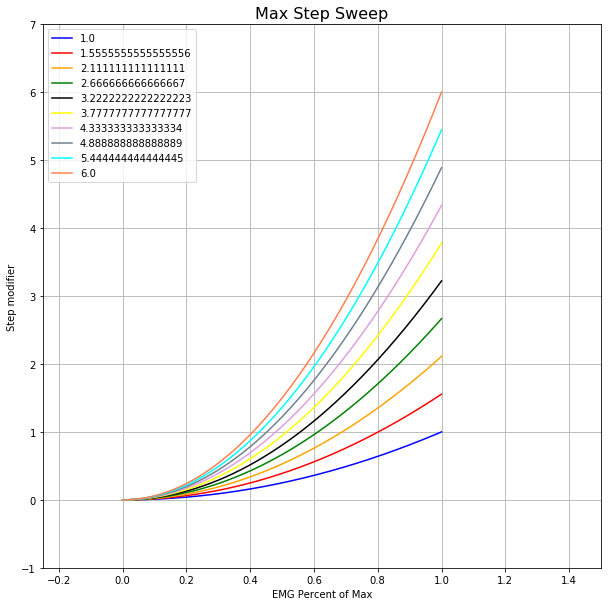

In [157]:
max_step = np.linspace(1, 6, 10) #Sensitivity Exponential 
b = 2

plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Step modifier')
plt.xlim([-0.25,1.5])
plt.ylim([-1,7])
plt.grid()
plt.clf

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for i in range(len(max_step)):
#     f1 =  max_pace * (t_pos-offset) ** b[i]
    f1 =  max_step[i] * (t_pos) ** b
#     f2 = -max_pace * t_neg ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])
#     plt.plot(t_pos, f1)
#     plt.plot(t_neg, f2, color = graph_color[i])
    
plt.legend(max_step, loc = 'upper left')
plt.title('Max Step Sweep', fontsize = 16)


## Sensitivity

The sensitivity is represented by the slope of this equation.  Based on a users ability or preference level it is desirable for independent tuning on how much the change in the input  changes the output.  Since the exponential can be fractional as well it will allow for the flexibility of the output to be driven by earlier or later in the domain. 

Text(0.5, 1.0, 'Sensitivity Sweep')

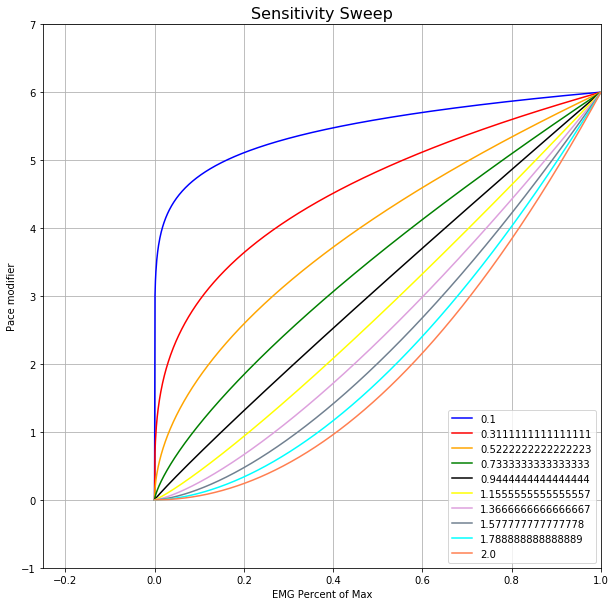

In [161]:
plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Pace modifier')
plt.xlim([-0.25,1])
plt.ylim([-1,7])
plt.grid()
plt.clf
b = np.linspace(.1, 2, 10) #Sensitivity Exponential 
max_step = 6 #max pace value
graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]

for i in range(0,len(b)):
    f1 =  max_step * (t_pos) ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])

plt.legend(b, loc = 'lower right')
plt.title('Sensitivity Sweep',fontsize = 16)



## Offset

The offset sets the dead band (change in input no change in output) to account for the baseline or resting level of EMG input.  By having this parameter we allow for a wider range of input values before the brace starts to move to account for movement artifact and different users resting EMG levels.

Text(0.5, 1.0, 'Offset Example')

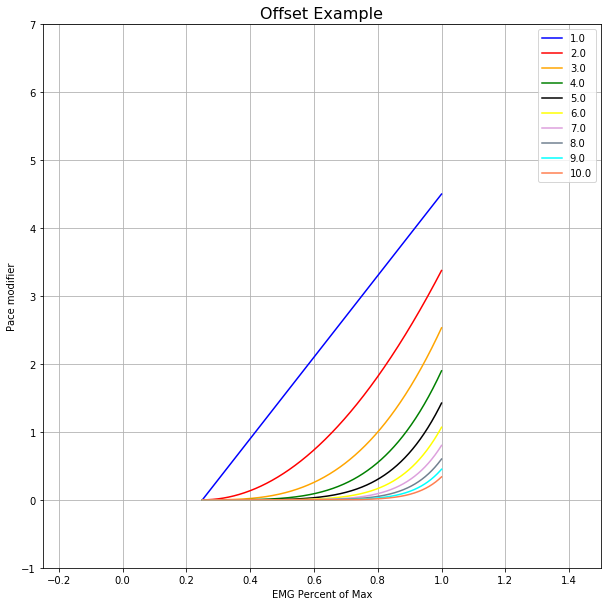

In [165]:
offset = 0.25

t_pos = np.linspace(offset, 1, 1000)
max_step = 6
b = np.linspace(1, 10, 10)


plt.figure(figsize=(10, 10))
plt.xlabel('EMG Percent of Max')
plt.ylabel('Pace modifier')
plt.xlim([-0.25,1.5])
plt.ylim([-1,7])
plt.grid()
plt.clf

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for i in range(len(b)):
    f1 =  max_pace * (t_pos-offset) ** b[i]
    plt.plot(t_pos, f1, color = graph_color[i])
    
plt.legend(b)
plt.title('Offset Example',fontsize = 16)


## Data Import

The below cell is used to import data directly from the log file generated from the serial window.  The importatned data will be used as a simulated input for the pace variable.  This import will also accomidate the use of CSV files

In [10]:
loc = 'C:/Users/MichaelDelph/Desktop/scriptstogeneraterawemgdatarawemgdatalogs/'
file_name = 'parsed_data.csv'
input_file = loc + file_name


df_raw = pd.read_csv(input_file, header=0, dtype=np.float64)
# print (df_raw.columns)

# print(df_raw["EMG0"].values)
# print(df_raw["EMG1"].values)
  
EMG0 = df_raw["EMG0"].values
EMG1 = df_raw['EMG1'].values


## Sample Wave form generation

The below cell is used to generate different arbitrary sample input waveforms.  To select a wave form simple comment out all others and run the cell.  The main parameters for the waveform are at the top of the cell and a graph will appear below as an output. 

Text(0.5, 1.0, 'Simulated Input Signal')

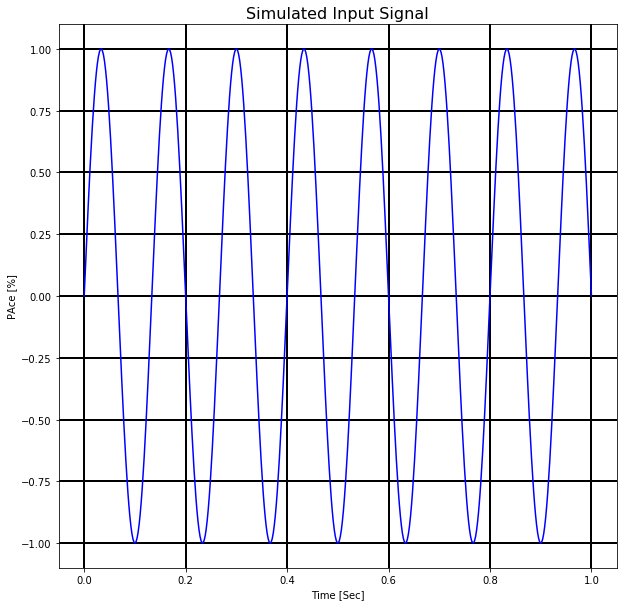

In [175]:
##### Variables ###############
## frequency adjusment
b = 15

## Amplitude
amp = 1

## Width/Duty Cycle adjusment 
wd = 0.25

t = np.linspace(0, 1, 500)

############## Functions ###################
##Saw tooth Wave
# pace = amp * signal.sawtooth(np.pi * b * t)

# ## Sin Wave
pace = amp * np.sin(amp * np.pi * b * t)

## Square Wave
# pace = amp * signal.square( np.pi * b * t)

## Step Function
# pace = [200] * len(t)

# ## Trapazoid
# def trapzoid_signal(t, width=2., slope=1., amp=1., offs=0):
#     a = slope*width*signal.sawtooth(2*np.pi*t/width, width=0.5)/4.
#     a[a>amp/2.] = amp/2.
#     a[a<-amp/2.] = -amp/2.
#     return (a + amp/2. + offs)
# pace = trapzoid_signal(t, wd, b, amp)

############### Plot ##################
plt.figure(figsize=(10,10))
plt.plot(t,pace, 'b')
plt.xlabel('Time [Sec]')
plt.ylabel('PAce [%]')
plt.grid(color='k', linestyle='-', linewidth=2)
plt.title("Simulated Input Signal", fontsize = 16)

## EMG Delta Calc
Not currently used

In [12]:
# if 0:
#     ##Constant Max EMG value for each Channel
#     EMG_0_Max = 250
#     EMG_1_Max = 250

#     ##What percentage of the max is the baseline threshold at
#     baseFact_0 = 0.25
#     baseFact_1 = 0.30

#     EMG0_Base = EMG_0_Max * baseFact_0
#     EMG1_Base = EMG_1_Max * baseFact_1

#     EMG0_delta = [1] * len(EMG0)
#     EMG1_delta = [1] * len(EMG1)
#     pace = [1] * len(EMG0)

#     EMG0_delta = EMG0 - EMG0_Base
#     EMG1_delta = EMG1 - EMG1_Base

#     for i in range(0,len(EMG0)):
#         if EMG0_delta[i] > EMG1_delta[i]:
#             pace[i] = (EMG0_delta[i]/EMG_0_Max)

#         if EMG0_delta[i] < EMG1_delta[i]:
#             pace[i] = (EMG1_delta[i]/EMG_1_Max)



#     # print (pace)
#     plt.figure(figsize=(10,10))
#     plt.plot(t,pace, 'b')
#     plt.xlabel('Time [mSec]')
#     plt.ylabel('Pace')
#     plt.grid(color='k', linestyle='-', linewidth=2)
#     plt.legend(['Pace'])
#     plt.title("Pace")

## Algorithm Definition And Implementation

In [170]:
############## Variables & Initialization ################

max_step = 6

offset = 0.1

b = 2

InitPos = 70

max_pos = 135
min_pos = 0

new_pos = [1]* len(t)
new_pos[0] = InitPos

modifier = [1]* len(t)
mod = [1]* len(t)


############## Function Definition ##############

## Below is the meat and potatos the function in here is used to select the value
## of what the modifier of the step should be.  This function could be anything.
## To adjust how the output is generated this is the only function that needs to change
##  x =  is the input
##  a =  is the amplitude of the function
## Tau = is the input offset
## m = the slope of the function

def ModifierFunction(x,a,Tau,m):
    function = (a * x ** m)
    return function

## This function is here to make sure that the physical limitations of the brace are observed.
## This is here so that the SP can not be set above the max or below of the physical limitations
## of the brace.  A More advanced function could look at the slider positions on myconfig as well as the 
## hard stops of the device.
## min_val = lower limit that the brace can reach
## max_val = upper limit that the brace can reach
## input_val = the value being compared to the min and max

def LimitCheck(min_val,max_val,input_val):
    if input_val > max_val:
        input_val = max_val
    if input_val < min_val:
        input_val = min_val
    return input_val

## This is the top level function.  This function first calculates what the modifier should be
## based off of the above selected equation, then it determines if that values should be added or 
## subtracted from the last SP value based off of the sign of the user intent.  Finally it checks
## to make sure that the new value is within the physical operational range of the system
##  amp = the amplitude of the modifier function
##  pace_input = the main input variable to the modifier function determened off of EMG Delta / Max EMG
##  tau = input offset for the modifier function
##  new_pos = array of new SP positions
##  min_pos =  lower hardware limit
##  max_pos =  upper hardware limit

def SetPositionCMD(amp,exp,pace_input,tau,new_pos,min_pos,max_pos):
    for i in range(1,len(pace_input)):
        modifier[i] = ModifierFunction(pace_input[i],amp,tau,exp)
        if pace_input[i] < 0:
            new_pos[i] = new_pos[i-1] - modifier[i]
        elif pace_input[i] > 0:
            new_pos[i] = new_pos[i-1] + modifier[i]
        new_pos[i] = LimitCheck(min_pos,max_pos,new_pos[i])
    return (new_pos)


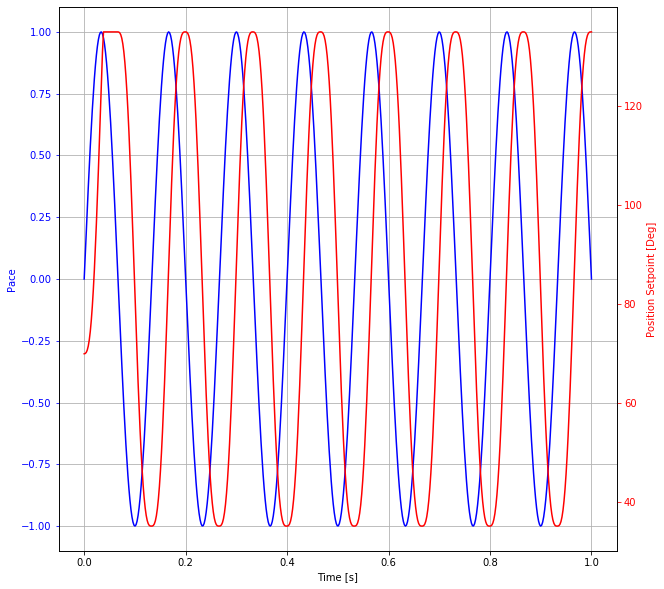

In [171]:
##################### Function Implementation #######################
pos = SetPositionCMD(max_pace,b,pace,offset,new_pos,min_pos,max_pos)


##################### Plotting #################################
fig,ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
# plt.figure(figsize=(10,10))
ax1.plot(t,pace, 'b-')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Pace', color='b')
ax1.tick_params('y', colors='b')
# ax1.legend(['Pace'], loc = 2)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(t, pos, 'r-')
ax2.set_ylabel('Position Setpoint [Deg]', color='r')
ax2.tick_params('y', colors='r')
# ax2.legend(['Setpoint'], loc = 1)



## Algorithm Implenetation Sweep

The following will sweep through different values of the Max step and Slope in order to evaluate the responsiveness of the algorithm to different inputs.  The below grapsh will show the equations that will drive the setpoint and thier response to a predetermined input waveform.  In the case of the sin wave the output waveform should follow the sin wave in form not in magnitude. 

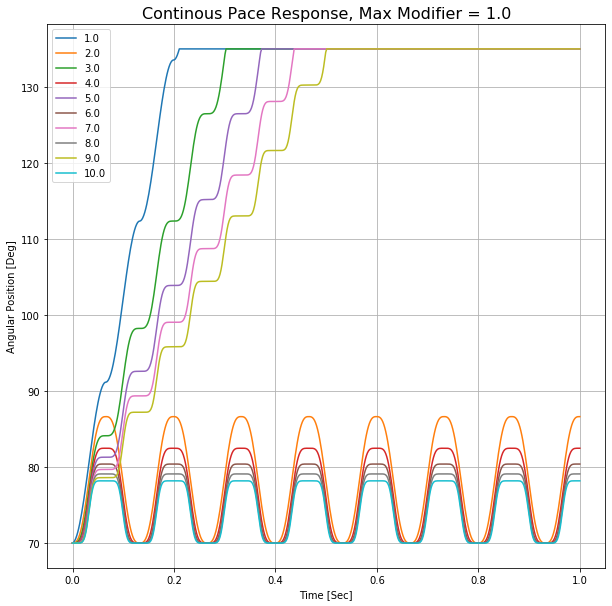

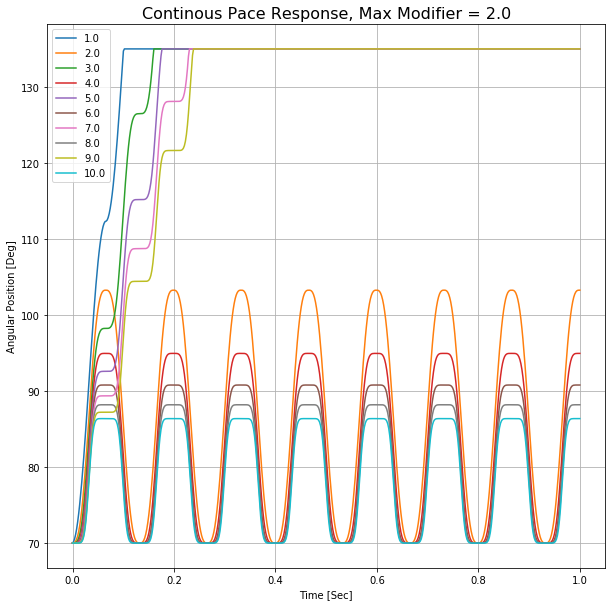

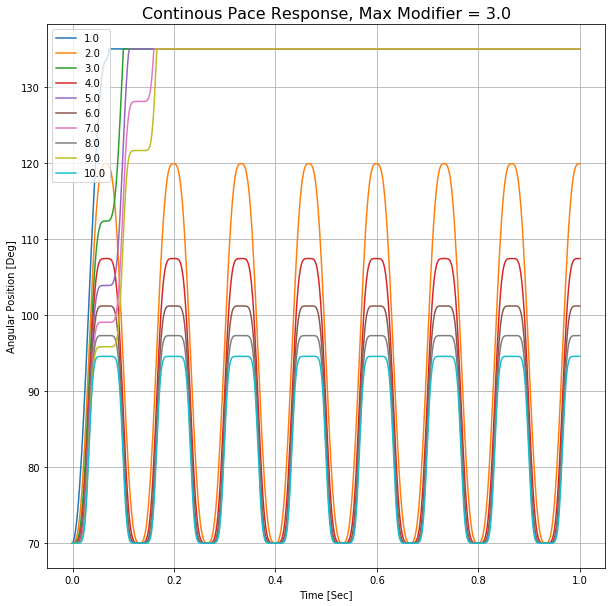

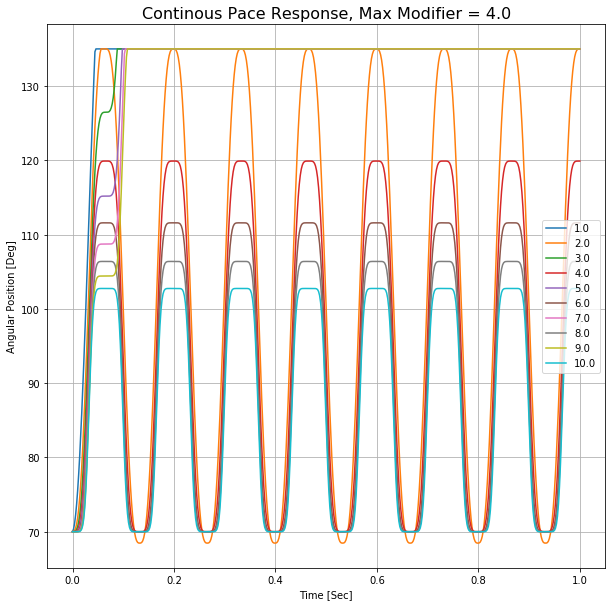

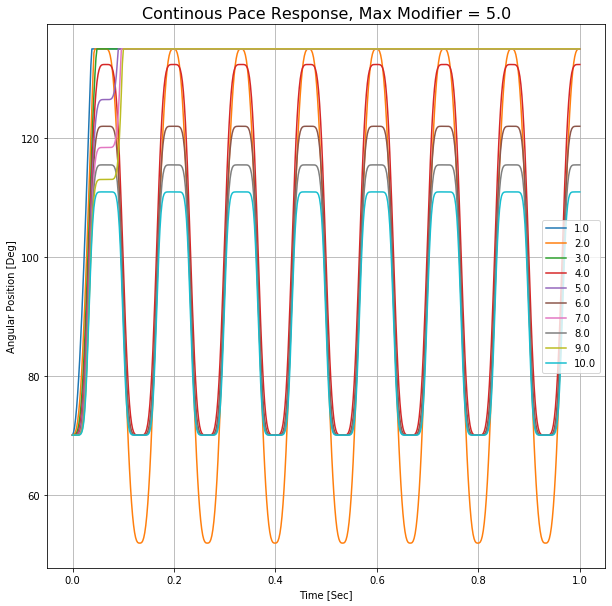

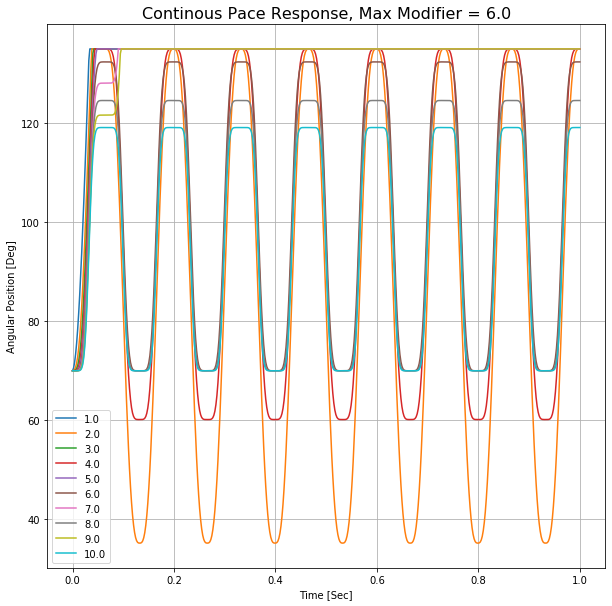

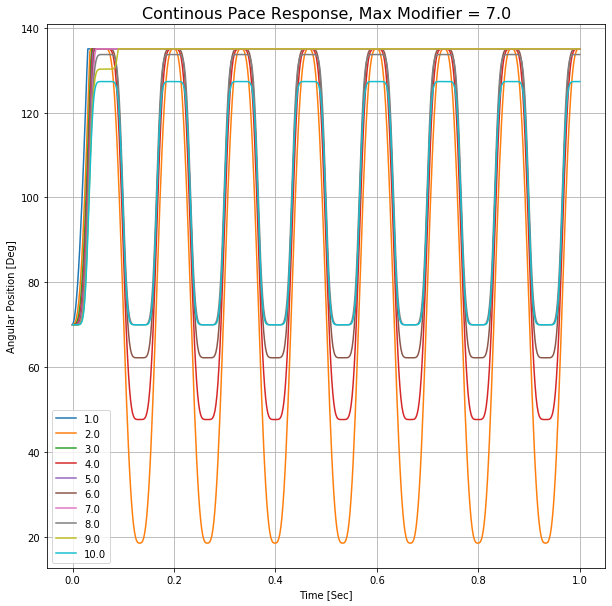

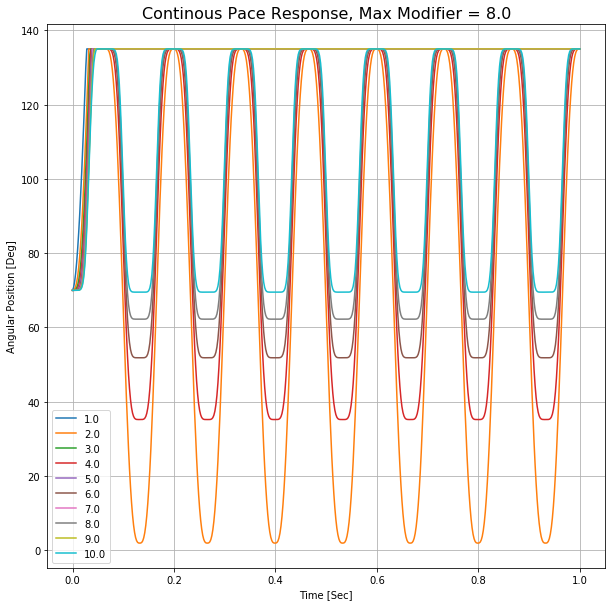

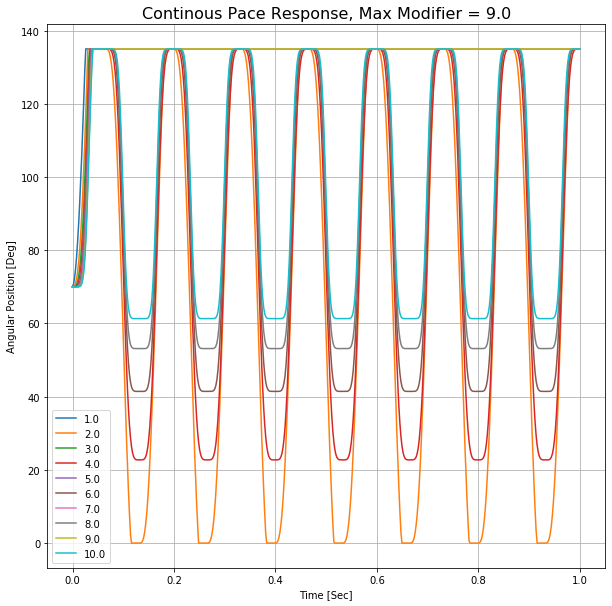

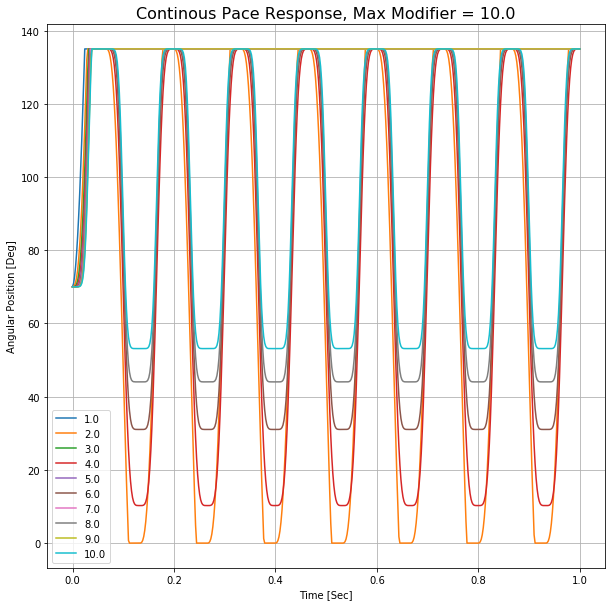

In [174]:
############ Variables ###############
max_step = (np.linspace(1, 10, 10))

# offset = 0.1

b = (np.linspace(1,10,10))

plt.clf


################## Plotting ###############

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
for j in range(len(max_step)):
    for i in range(len(b)):
        plt.figure(num = j,figsize=(10, 10))
        f1 =  ContiousPaceFunction(max_step[j],b[i],pace,offset,new_pos,min_pos,max_pos)
#         plt.plot(t,pace,'k')
        plt.plot(t, f1)
        plt.grid(True)
        plt.xlabel('Time [Sec]')
        plt.ylabel('Angular Position [Deg]')
        plt.legend(b)
        plt.title('Continous Pace Response, Max Modifier = {}'.format(max_step[j]), fontsize=16)
    



In [132]:
# plt.clf

# graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]
# fig, ax = plt.subplots(2, 5,figsize=[30,30])
# ax = ax.flatten()
# for j in range(len(max_pace)):
#         ax[j].plot(t,pace, 'k-')
#         ax[j].set_ylabel('Pace', color='k')
#         ax[j].tick_params('y', colors='k')
#         ax[j].grid(True)
#         for i in range(len(b)):
#             ax2 = ax.twinx()
#             f1 =  ContiousPaceFunction(max_pace[j],b[i],pace,offset,new_pos,min_pos,max_pos)
#             ax2[j].plot(t, f1)
#             ax2[j].set_ylabel('Position Setpoint [Deg]', color='k')
#             ax2[j].tick_params('y', colors='k')
#             ax2[j].legend(b)# 

## Response Compare
The below cell allows you to compare how well an equation will follow the inputs it is given.  The black waveform is the input and the different colored reponses represent the SP outpoint with different slopes.  Currently you must manual adjust the max step value by selecting its position in the area using the mod counter variable.  

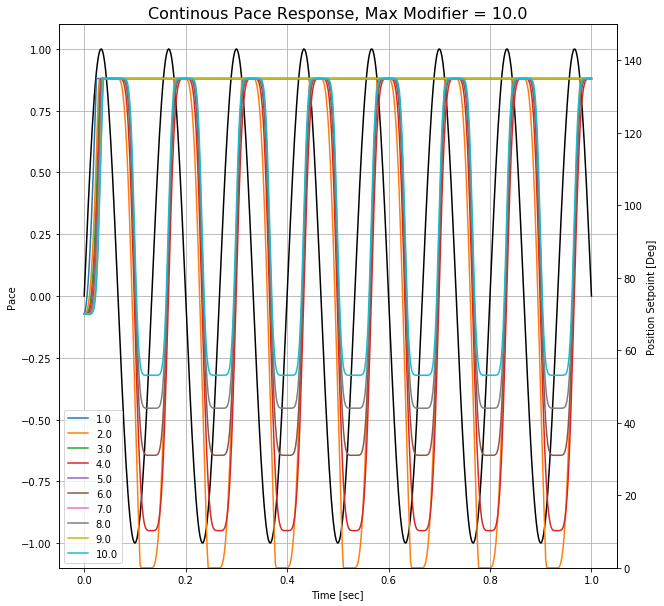

In [141]:
plt.clf

##max value is 9
mod_counter = 9

graph_color = ["blue", "red","orange","green","black","yellow","plum","slategrey","cyan", "coral"]

# for j in range(len(max_pace)):
fig, ax = plt.subplots(figsize=[10,10])
ax.plot(t,pace, 'k-')
ax.set_ylabel('Pace', color='k')
ax.tick_params('y', colors='k')
ax.set_xlabel('Time [sec]')
ax.grid(True)
ax2 = ax.twinx()
ax2.set_ylabel('Position Setpoint [Deg]', color='k')
ax2.tick_params('y', colors='k')
ax2.set_ylim([0,150])
ax.set_title('Continous Pace Response, Max Modifier = {}'.format(max_pace[mod_counter]), fontsize=16)
for i in range(len(b)):
    f1 =  ContiousPaceFunction(max_pace[mod_counter],b[i],pace,offset,new_pos,min_pos,max_pos)
    ax2.plot(t, f1)
    ax2.legend(b)